# Logistic Regression

Unlike __regression__, which creates a continuous distribution to model datapoints, __classification__ is used to separate datapoints into categories. While __Logistic Regression__ contains the word *regression*, it's a __classification__ algorithm that uses __regression__ as its basis.

<img src="linearLogisticRegression.png" alt="Linear Representation of Logistic Regression" style="width: 700px;"/>

In the graph above, a y-value of 0 and 1 represent two different categories. Even with these categories, a __Linear Regression__ can be performed. But instead of thinking about the range between 0 and 1 as numbers, it is better to think of them as probabilities. For example, lets say the independent variable is age for the graph along the x-axis. As a result, it shows that younger people usually are part of the 0 category, while older people are part of the 1 category. The line then represents the probability, based on age, that a person is in the 1 category.

<img src="sigmoidTransformation.png" alt="Sigmoid Transformation of Logistic Regression" style="width: 500px;"/>

The transformation from __Linear Regression__ to __Logistic Regression__ can be done through many functions, the most commonly used being the __Sigmoid Function__. The __Sigmoid Function__ maps any real value into another value between 0 and 1, essentially mapping predictions to probabilities. Using the new function, a _boundary line_ can be selected such as 0.5. Any age in the current graph that has a prediction value ($\hat p$) below 0.5 will be classified as being part of the 0 category ($\hat y$), while any age that has a prediction value above 0.5 will be classified as being part of the 1 category. The boundary line doesn't always have to be 0.5 and can be changed based on prior experience with the dataset being analyzed.

<img src="mappingValues.png" alt="Mapping datapoints using the sigmoid function." style="width: 700px;"/>

<hr>

# Code

__Setting up the dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<hr>

__Fitting the Classifier & Making Predictions:__

In [2]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating a Confusion Matrix:__ <br>
Count matrix of predicted & actual results. |
_Row-Basis_ : Actual Value |
_Column-Basis_ : Predicted Value |

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[65  3]
 [ 8 24]]
0.89


<hr>

__Visual Training & Test Set Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


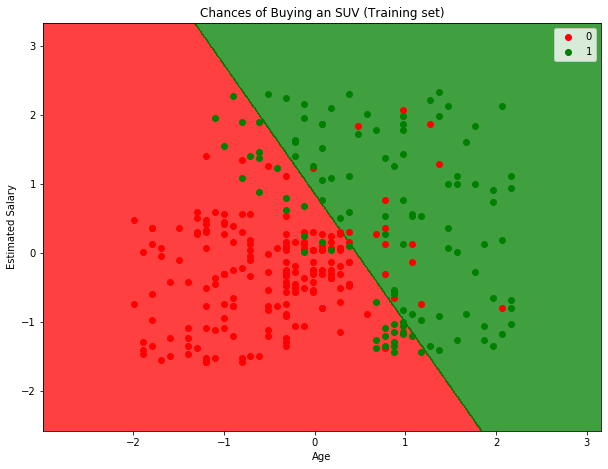

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


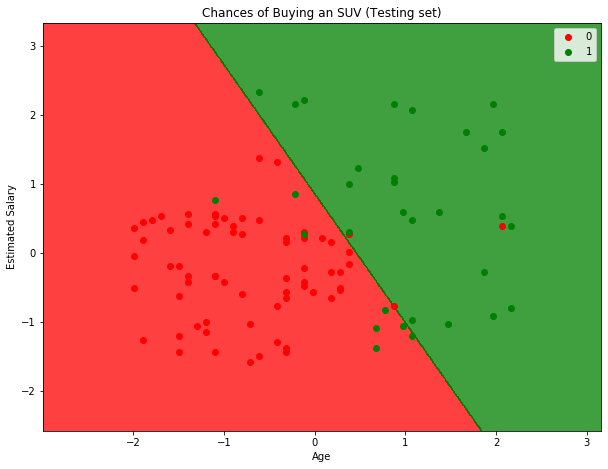

In [8]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Visualizer Function:
def display(X_set, y_set, type):
    # Creating the background based on the classifier
    from matplotlib.colors import ListedColormap
    """Creates a grid which serves as the basis for displaying information."""
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    
    """
    Displays the color background differentiating the two categories.
    (.countourf()) creates the background, (.ravel()) flattens matrix to array, (.T) returns transpose of array.
    """
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    
    
    # Plotting the actual datapoints for comparison
    """Creates the axis for the graph."""
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    """Plots the datapoints."""
    for index, value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == value, 0], X_set[y_set == value, 1],
                    c = ListedColormap(('red', 'green'))(index), label = value)
        
    # Labels
    plt.title('Chances of Buying an SUV (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')

__Results:__
The graph shows the original dataset as datapoints. If the color is green, the person bought an SUV. Alternatively, the background shows the predictions of the classifier. All datapoints falling within the red region will be predicted to not have bought an SUV, while the datapoints falling within the green region will be predicted to have bought one. This is a linear classification, which is why the regions aren't curved to adjust for the many green datapoints in the red region.